# Analysis

In [2]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Set path to load files from
# res_path = '/Users/tom/Documents/GitCode/Confidence_Scanner/scripts/results/'
res_path = '/Users/wdfox/Documents/GitCode/Confidence_Scanner/scripts/results/'

In [4]:
# Load files
dfs = []
for dat_type in ['Papers', 'PRs']:
    
    d1 = pd.read_csv(os.path.join(res_path, dat_type + '_readability.csv'))
    d2 = pd.read_csv(os.path.join(res_path, dat_type + '_analysis.csv'))
    d3 = pd.read_csv(os.path.join(res_path, dat_type + '_analysis_test.csv'))
    
    # Merge dataframes
    df = pd.merge(d1, d2, on=['id', 'term'])
    # df = pd.merge(d1, d3, on=['id', 'term'])
    df['dat_type'] = dat_type
    
    dfs.append(df)

In [5]:
# Combine into one joint df, with all data (papers and press releases)
df = pd.concat(dfs)

In [6]:
# Clean up df
df.set_index('id', inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

# Drop currently empty columns
# df.drop('liu', axis=1, inplace=True)
# df.drop('subj', axis=1, inplace=True)

In [7]:
# Check out a few rows
df.head()

,term,fk,smog,consen,ar,fkg,fks,lwf,vader,liu,subj,liwc,dat_type
id,,,,,,,,,,,,,
29373119,autism,NaN,16.6,NaN,18.2,15.2,18.86,7.500000,1.0194,-1.0,3.0,6.0,Papers
29369294,autism,NaN,18.2,NaN,22.2,17.7,12.46,7.916667,-2.5924,-2.0,5.0,6.0,Papers
29367178,autism,NaN,15.1,NaN,14.8,13.1,35.07,7.000000,0.9111,2.0,-2.0,8.0,Papers
29361396,autism,NaN,21.3,NaN,23.7,19.8,12.30,18.000000,-0.9329,-3.0,0.0,0.0,Papers
29358944,autism,NaN,17.3,NaN,18.5,16.5,21.02,13.125000,0.0173,1.0,-1.0,6.0,Papers


In [8]:
# Check how many there are of each data type
df['dat_type'].value_counts()

Papers    9913
PRs       5659
Name: dat_type, dtype: int64

In [9]:
# Check how many documents there are for each term
df['term'].value_counts()

diabetes         2564
stroke           1988
perception       1681
vaccines         1417
dementia         1318
cognition        1312
autism           1277
hypertension     1243
epilepsy         1078
consciousness    1035
optogenetics      659
Name: term, dtype: int64

In [10]:
# Check how many of each document there are, split up by document type and term
df.groupby(['dat_type', 'term']).size()

dat_type  term         
PRs       autism            321
          cognition         346
          consciousness      81
          dementia          391
          diabetes         1694
          epilepsy          201
          hypertension      337
          optogenetics       53
          perception        701
          stroke           1078
          vaccines          456
Papers    autism            956
          cognition         966
          consciousness     954
          dementia          927
          diabetes          870
          epilepsy          877
          hypertension      906
          optogenetics      606
          perception        980
          stroke            910
          vaccines          961
dtype: int64

In [11]:
# Descriptive statistics
df.describe()

,fk,smog,consen,ar,fkg,fks,lwf,vader,liu,subj,liwc
count,0.0,15572.000000,0.0,15572.000000,15572.000000,15572.000000,15572.000000,15572.000000,15572.000000,15572.000000,15572.000000
mean,NaN,15.323029,NaN,17.077460,13.951554,33.341476,11.187369,0.659905,-0.430067,-1.958515,3.245055
std,NaN,2.431701,NaN,3.352809,2.870670,14.360262,3.908731,2.658634,4.521798,4.695214,5.437597
min,NaN,0.000000,NaN,2.100000,-3.500000,-193.840000,0.500000,-15.723300,-27.000000,-39.000000,-32.000000
25%,NaN,14.000000,NaN,15.000000,12.200000,24.270000,8.250000,-0.656975,-3.000000,-5.000000,0.000000
50%,NaN,15.300000,NaN,17.000000,13.900000,34.290000,10.900000,0.544750,0.000000,-2.000000,3.000000
75%,NaN,16.800000,NaN,19.000000,15.700000,43.060000,13.250000,1.824900,2.000000,1.000000,6.000000
max,NaN,26.200000,NaN,68.500000,54.800000,126.530000,59.000000,40.804400,38.000000,32.000000,47.000000


In [19]:
pd.set_option('display.max_columns', 100)
df.groupby(['dat_type']).describe()

ar                                                   consen  \
           count       mean       std  min   25%   50%   75%   max  count   
dat_type                                                                    
PRs       5659.0  16.880633  2.616787  8.3  15.2  16.7  18.3  46.5    0.0   
Papers    9913.0  17.189821  3.703481  2.1  14.8  17.2  19.5  68.5    0.0   

                                         fk                               \
         mean std min 25% 50% 75% max count mean std min 25% 50% 75% max   
dat_type                                                                   
PRs       NaN NaN NaN NaN NaN NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN   
Papers    NaN NaN NaN NaN NaN NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN   

             fkg                                                       fks  \
           count       mean       std  min   25%   50%   75%   max   count   
dat_type                                                                     
PRs       5659.0  13.674819  2.091448 -0.6  12.3  13.6  14.9  41.0  5659.0   
Papers    9913.0  14.109533  3.221807 -3.5  12.0  14.2  16.2  54.8  9913.0   

                                                                        liu  \
               mean        std     min    25%    50%    75%     max   count   
dat_type                                                                      
PRs       39.691338  10.316009 -193.84  33.46  40.18  46.91  102.78  5659.0   
Papers    29.716552  15.067943  -91.30  19.87  29.59  39.43  126.53  9913.0   

                                                           liwc            \
              mean       std   min  25%  50%  75%   max   count      mean   
dat_type                                                                    
PRs      -0.347941  6.277768 -27.0 -4.0  0.0  4.0  38.0  5659.0  4.652942   
Papers   -0.476949  3.101247 -17.0 -2.0  0.0  2.0  11.0  9913.0  2.441340   

                                                  lwf                       \
               std   min  25%  50%  75%   max   count       mean       std   
dat_type                                                                     
PRs       7.290546 -32.0  0.0  4.0  9.0  47.0  5659.0  12.623308  4.075042   
Papers    3.785514 -13.0  0.0  2.0  5.0  23.0  9913.0  10.367639  3.559853   

                                                     smog             \
               min    25%   50%        75%    max   count       mean   
dat_type                                                               
PRs       0.500000  10.20  12.5  14.854167  30.25  5659.0  14.999788   
Papers    0.833333   7.75  10.4  12.500000  59.00  9913.0  15.507556   

                                                   subj                      \
               std  min   25%   50%   75%   max   count      mean       std   
dat_type                                                                      
PRs       1.743512  0.0  14.0  14.9  16.0  23.0  5659.0 -3.621488  5.812695   
Papers    2.731342  0.0  13.9  15.7  17.3  26.2  9913.0 -1.009180  3.586673   

                                      vader                               \
           min  25%  50%  75%   max   count      mean       std      min   
dat_type                                                                   
PRs      -39.0 -7.0 -3.0  0.0  32.0  5659.0  1.236366  3.769799 -15.7233   
Papers   -16.0 -3.0 -1.0  1.0  18.0  9913.0  0.330823  1.641219 -10.8312   

                                            
             25%     50%      75%      max  
dat_type                                    
PRs      -0.9089  1.2385  3.36185  40.8044  
Papers   -0.5996  0.3899  1.31960   7.9335

In [11]:
# Check correlation between metrics
corrs = df.corr()
corrs

,fk,smog,consen,ar,fkg,fks,lwf,vader,liu,subj,liwc
fk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smog,NaN,1.000000,NaN,0.665120,0.792806,-0.726159,0.296118,0.031964,0.056499,0.061989,-0.046770
consen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ar,NaN,0.665120,NaN,1.000000,0.892484,-0.759913,0.431250,0.029303,0.055966,0.055518,-0.043981
fkg,NaN,0.792806,NaN,0.892484,1.000000,-0.887701,0.447228,0.035470,0.065473,0.060126,-0.055660
fks,NaN,-0.726159,NaN,-0.759913,-0.887701,1.000000,-0.197406,0.025158,-0.041089,-0.129386,0.095517
lwf,NaN,0.296118,NaN,0.431250,0.447228,-0.197406,1.000000,0.076693,0.044054,-0.079874,0.044682
vader,NaN,0.031964,NaN,0.029303,0.035470,0.025158,0.076693,1.000000,0.681322,0.005589,0.162456
liu,NaN,0.056499,NaN,0.055966,0.065473,-0.041089,0.044054,0.681322,1.000000,0.062198,0.122838
subj,NaN,0.061989,NaN,0.055518,0.060126,-0.129386,-0.079874,0.005589,0.062198,1.000000,-0.173423


ValueError: zero-size array to reduction operation minimum which has no identity

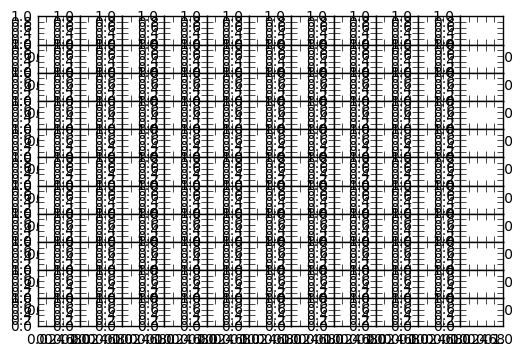

In [12]:
# Plot relations between metrics
pd.plotting.scatter_matrix(df);

In [13]:
# Check the average scores for each measure across different terms
avgs = df.groupby(['term', 'dat_type']).mean()
avgs

fk       smog  consen         ar        fkg  \
term          dat_type                                                
autism        PRs      NaN  15.296262     NaN  17.042991  13.900000   
              Papers   NaN  16.020816     NaN  18.008159  14.839226   
cognition     PRs      NaN  15.184682     NaN  16.876301  13.736994   
              Papers   NaN  16.123602     NaN  17.990683  14.924741   
consciousness PRs      NaN  15.144444     NaN  17.058025  13.870370   
              Papers   NaN  15.570755     NaN  17.203249  14.133438   
dementia      PRs      NaN  15.246803     NaN  16.989770  13.882864   
              Papers   NaN  15.703560     NaN  17.230313  14.215318   
diabetes      PRs      NaN  15.030401     NaN  16.933884  13.700000   
              Papers   NaN  14.739310     NaN  15.955977  13.075057   
epilepsy      PRs      NaN  14.710448     NaN  16.458209  13.315423   
              Papers   NaN  15.049715     NaN  17.183694  13.748233   
hypertension  PRs      NaN  15.107418     NaN  17.089911  13.836202   
              Papers   NaN  14.529139     NaN  15.923068  12.912583   
optogenetics  PRs      NaN  15.230189     NaN  16.850943  13.767925   
              Papers   NaN  17.197525     NaN  19.542739  16.568812   
perception    PRs      NaN  15.020685     NaN  16.801427  13.682311   
              Papers   NaN  15.699898     NaN  17.101939  14.230816   
stroke        PRs      NaN  14.741187     NaN  16.902597  13.568275   
              Papers   NaN  14.499121     NaN  15.903297  12.730440   
vaccines      PRs      NaN  14.900000     NaN  16.551535  13.431140   
              Papers   NaN  15.854735     NaN  17.659313  14.464516   

                              fks        lwf     vader       liu      subj  \
term          dat_type                                                       
autism        PRs       38.743333  12.761972  1.859850  0.000000 -3.566978   
              Papers    26.819498  10.908569  0.227157 -0.871339 -0.688285   
cognition     PRs       39.213844  12.465154  2.302075  1.300578 -2.294798   
              Papers    26.081812  10.565741  0.509583 -0.059006 -0.420290   
consciousness PRs       39.353210  13.161464 -0.247636 -1.666667 -3.259259   
              Papers    29.745629   9.983583 -0.086092 -0.843816 -0.971698   
dementia      PRs       38.867621  12.596582  1.502221 -0.324808 -3.409207   
              Papers    29.156861  10.117829  0.436985 -0.628910 -0.778857   
diabetes      PRs       39.376930  12.662626  1.188544 -0.638725 -4.174734   
              Papers    33.662092   9.839773  0.344294 -0.731034 -1.447126   
epilepsy      PRs       42.030547  12.943061  1.290769 -0.034826 -2.955224   
              Papers    31.540901  10.123229  0.268929 -0.404789 -1.106043   
hypertension  PRs       38.414510  12.980228  0.486615 -1.201780 -3.756677   
              Papers    33.916115  10.074638  0.042915 -0.886313 -1.609272   
optogenetics  PRs       39.246038  11.656289  2.492258  1.962264 -3.622642   
              Papers    17.602442  11.595141  0.625489  0.559406 -0.207921   
perception    PRs       40.083852  12.224617  1.941254  1.138374 -2.322397   
              Papers    29.836969  10.361396  0.585642 -0.044898 -0.755102   
stroke        PRs       40.374564  13.014046  0.415033 -0.914657 -3.662338   
              Papers    35.919044  10.135046  0.049812 -0.923077 -1.620879   
vaccines      PRs       40.401053  11.823812  1.444329 -1.269737 -4.951754   
              Papers    29.210135  10.682344  0.701879 -0.115505 -1.314256   

                            liwc  
term          dat_type            
autism        PRs       5.707165  
              Papers    2.533473  
cognition     PRs       4.390173  
              Papers    2.516563  
consciousness PRs       4.098765  
              Papers    2.085954  
dementia      PRs       4.887468  
              Papers    2.406688  
diabetes      PRs       5.089138  
              Papers    2.851724  
epilepsy      PRs       4.

ValueError: max must be larger than min in range parameter.

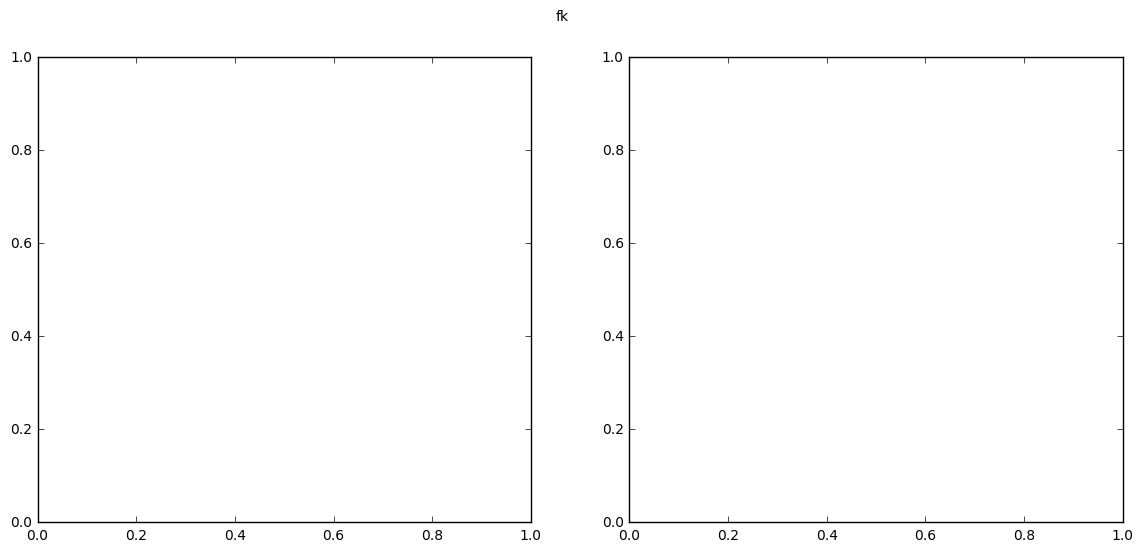

In [14]:
# Plot
for metric in ['fk', 'smog', 'ar', 'vader', 'liwc']:
    fig, ax = plt.subplots(1, 2, figsize=[14, 6])
    plt.suptitle(metric)
    ax[0].hist(df[metric], bins=25);
    pd.plotting.boxplot(df[metric], ax=ax[1]);

In [15]:
# Check the average differences between data types
df.groupby('dat_type').mean()

,fk,smog,consen,ar,fkg,fks,lwf,vader,liu,subj,liwc
dat_type,,,,,,,,,,,
PRs,NaN,14.999788,NaN,16.880633,13.674819,39.691338,12.623308,1.236366,-0.347941,-3.621488,4.652942
Papers,NaN,15.507556,NaN,17.189821,14.109533,29.716552,10.367639,0.330823,-0.476949,-1.009180,2.441340
